## Data Transformation
Transformation of the data to remove outliers in the continous category columns
### Outlier columns 
The data is first visualized to ascertain the location of most outlier values. 
Four columns with outliers are selected for the transformation : elpsdm, n24, rev24 and revlast. 
### Transformation Strategy
The strategy is to eliminate values that lie outside the three quartiles for each column. A multiplication factor of 1.5 is used together with the interquartile range to delete values were considered to be outliers. 
A second visualization shows a reduction of outliers. The data is then exported to a new file. 

In [1]:
import pandas as pd 

import numpy as np 

import seaborn as sns
import plotly.express as px

import matplotlib
import matplotlib.pyplot as plt 

In [2]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#000000'

In [3]:
df = pd.read_csv('../datasets/dmtrain.csv')

In [4]:
df.head()

,id,n24,rev24,revlast,elpsdm,ordfreq,ordcat,response
0,1,2,30.0,20.0,24,1,6,1
1,2,25,207.0,20.0,24,1,6,0
2,3,5,52.0,15.0,24,1,6,0
3,4,11,105.0,15.0,24,1,6,0
4,5,2,32.0,17.0,24,1,6,0


In [7]:
df.columns

Index(['id', 'n24', 'rev24', 'revlast', 'elpsdm', 'ordfreq', 'ordcat',
       'response'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        2000 non-null   int64  
 1   n24       2000 non-null   int64  
 2   rev24     2000 non-null   float64
 3   revlast   2000 non-null   float64
 4   elpsdm    2000 non-null   int64  
 5   ordfreq   2000 non-null   int64  
 6   ordcat    2000 non-null   int64  
 7   response  2000 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 125.1 KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,2000.0,1000.500000,577.494589,1.0,500.75,1000.50,1500.2500,2000.0
n24,2000.0,10.285500,8.814070,1.0,4.00,8.00,14.0000,82.0
rev24,2000.0,107.830895,126.751417,15.0,43.00,80.95,131.8125,2200.0
revlast,2000.0,16.863475,16.623265,0.0,10.00,15.00,20.0000,415.0
elpsdm,2000.0,15.111000,4.150939,1.0,13.00,15.00,17.0000,24.0
ordfreq,2000.0,2.024000,1.108620,1.0,1.00,2.00,3.0000,4.0
ordcat,2000.0,5.727000,0.869396,4.0,5.00,6.00,6.0000,7.0
response,2000.0,0.292000,0.454796,0.0,0.00,0.00,1.0000,1.0


In [10]:
df.columns

Index(['id', 'n24', 'rev24', 'revlast', 'elpsdm', 'ordfreq', 'ordcat',
       'response'],
      dtype='object')

In [7]:
pair_cols = ['n24', 'rev24', 'revlast', 'elpsdm', 'ordfreq', 'ordcat']

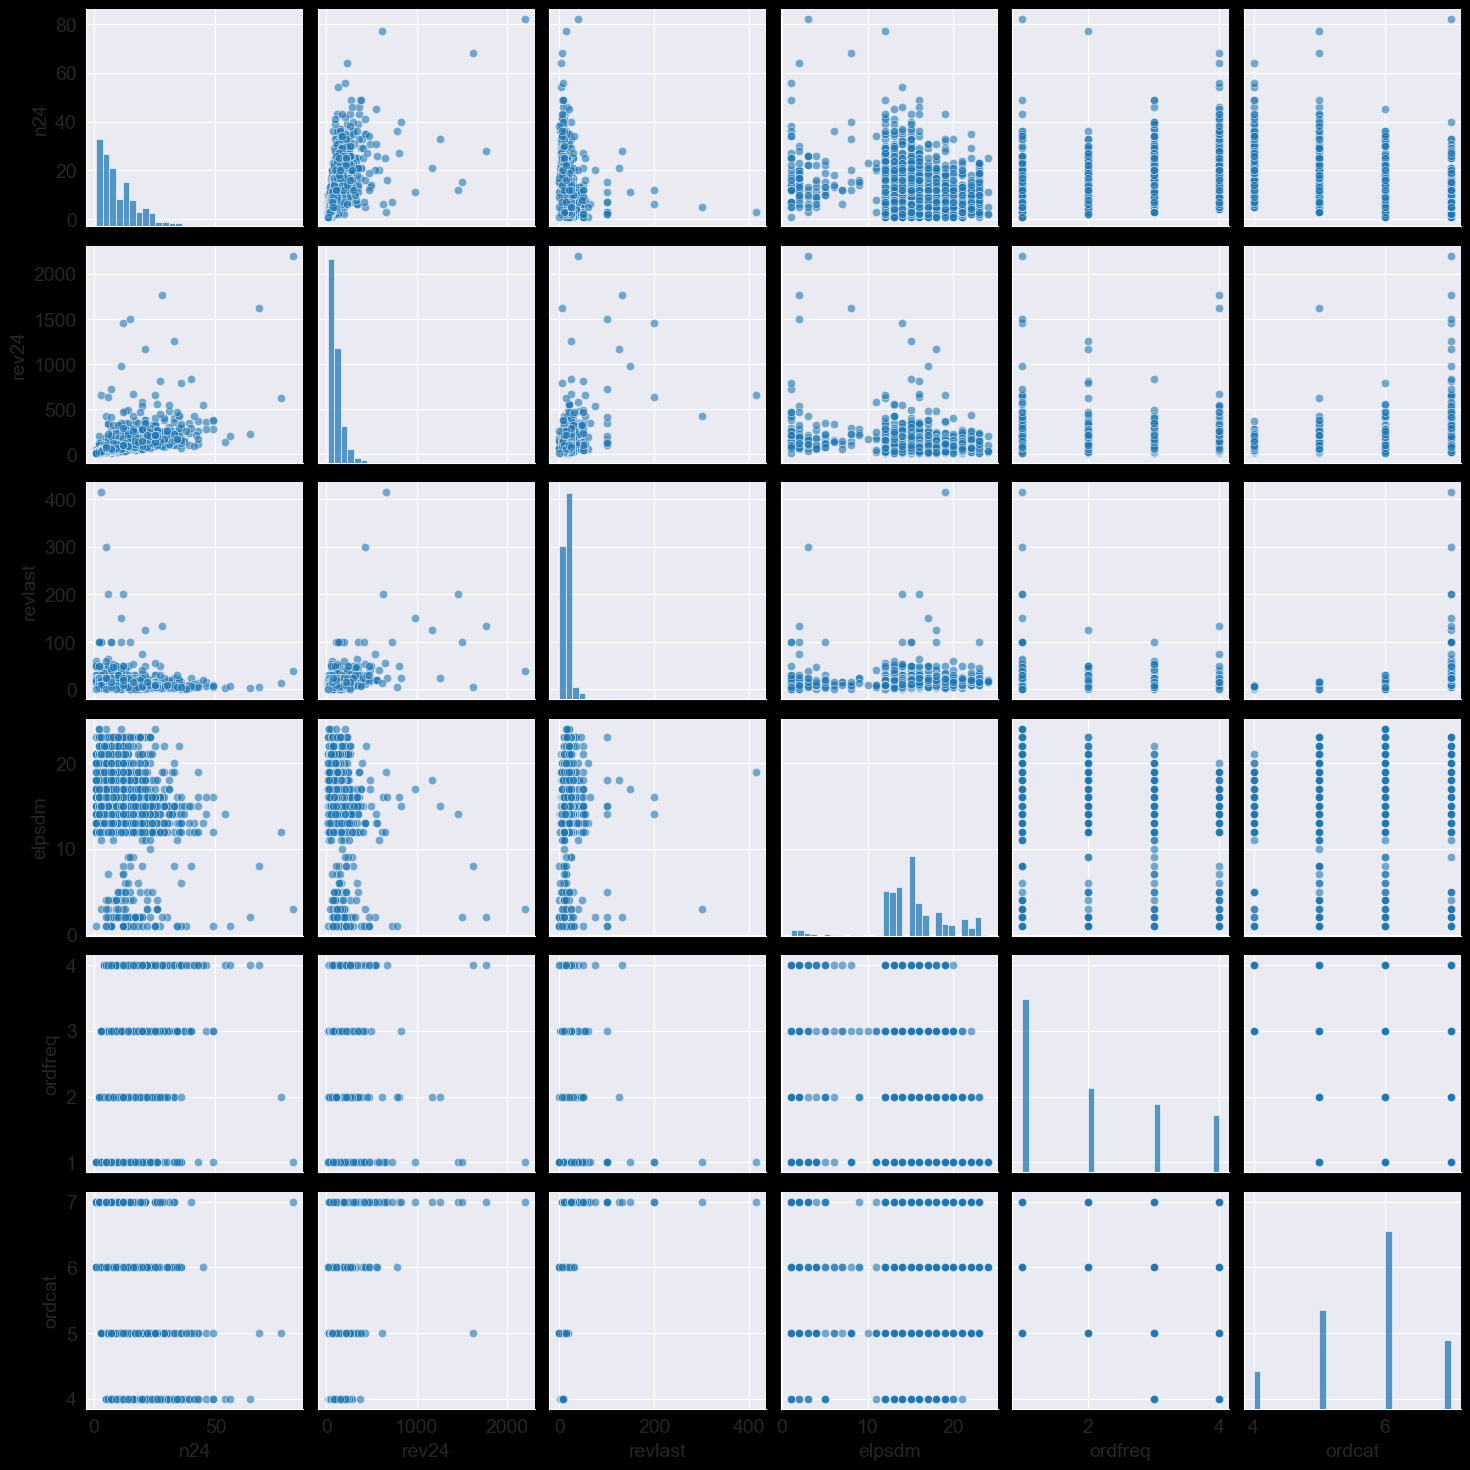

In [8]:
sns.pairplot(df[pair_cols], plot_kws={'alpha':0.6}, diag_kws={'bins':30})

In [9]:
fig = px.histogram(df, x='n24', marginal='box', nbins=47, title='n24 Distribution')
fig.update_layout(bargap=0.1)
fig.show()

In [10]:
fig = px.histogram(df, x='rev24', marginal='box', nbins=47, title='rev24 Distribution')
fig.update_layout(bargap=0.1)
fig.show()

In [11]:
fig = px.histogram(df, x='revlast', marginal='box', nbins=47, title='revlast Distribution')
fig.update_layout(bargap=0.1)
fig.show()

In [12]:
fig = px.histogram(df, x='elpsdm', marginal='box', nbins=47, title='elpsdm Distribution')
fig.update_layout(bargap=0.1)
fig.show()

In [13]:
df.columns 

Index(['id', 'n24', 'rev24', 'revlast', 'elpsdm', 'ordfreq', 'ordcat',
       'response'],
      dtype='object')

In [14]:
outlier_cols = ['n24', 'rev24', 'revlast', 'elpsdm']

In [15]:
def outlier_limit(df, col):
    print(col)
    print('-'*50)
    q25, q75 = np.percentile(df[col], 25), np.percentile(df[col], 75)

    iqr = q75 - q25

    print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))

    cut_off = iqr * 1.5

    lower, upper = q25 - cut_off, q75 + cut_off

    print('Lower: ' ,lower, ' upper:' ,upper)

    return lower, upper

In [16]:
outlier_limit(df, outlier_cols)

['n24', 'rev24', 'revlast', 'elpsdm']
--------------------------------------------------
Percentiles: 25th=11.000, 75th=25.000, IQR=14.000
Lower:  -10.0  upper: 46.0


(np.float64(-10.0), np.float64(46.0))

In [17]:
def remove_outlier(df, col, upper, lower):

    outliers = [x for x in df[col] if x > upper]

    print('Identified outliers: %d' % len(outliers))

    outliers_removed = [x for x in df[col] if x >= lower  and x <= upper]

    print('Non-outliers observations: %d' % len(outliers_removed))

    final = np.where(df[col] > upper, upper, np.where(df[col] < lower, lower, df[col]))

    return final

In [18]:
for col in outlier_cols:
    lower, upper = outlier_limit(df, col)
    df[col] = remove_outlier(df, col, upper, lower)

n24
--------------------------------------------------
Percentiles: 25th=4.000, 75th=14.000, IQR=10.000
Lower:  -11.0  upper: 29.0
Identified outliers: 70
Non-outliers observations: 1930
rev24
--------------------------------------------------
Percentiles: 25th=43.000, 75th=131.812, IQR=88.812
Lower:  -90.21875  upper: 265.03125
Identified outliers: 95
Non-outliers observations: 1905
revlast
--------------------------------------------------
Percentiles: 25th=10.000, 75th=20.000, IQR=10.000
Lower:  -5.0  upper: 35.0
Identified outliers: 61
Non-outliers observations: 1939
elpsdm
--------------------------------------------------
Percentiles: 25th=13.000, 75th=17.000, IQR=4.000
Lower:  7.0  upper: 23.0
Identified outliers: 5
Non-outliers observations: 1902


In [19]:
fig = px.histogram(df, x='elpsdm', marginal='box', nbins=47, title='elpsdm Distribution')
fig.update_layout(bargap=0.1)
fig.show()

In [20]:
fig = px.histogram(df, x='revlast', marginal='box', nbins=47, title='revlast Distribution')
fig.update_layout(bargap=0.1)
fig.show()

In [21]:
fig = px.histogram(df, x='rev24', marginal='box', nbins=47, title='rev24 Distribution')
fig.update_layout(bargap=0.1)
fig.show()

In [22]:
fig = px.histogram(df, x='n24', marginal='box', nbins=47, title='n24 Distribution')
fig.update_layout(bargap=0.1)
fig.show()

In [33]:
df.to_csv('../datasets/dmtrain_transformed.csv')